In [37]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [38]:
start_up_data = pd.read_csv("C:/Users/R I C H A R D/Desktop/startup/investments_VC.csv", encoding='ISO-8859-1')


In [39]:
start_up_data.head(10)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,"70,00,000",NaN,USA,FL,Ft. Lauderdale,...,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,...,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
print(start_up_data.columns)


Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')


In [41]:
data_column = [
    ' funding_total_usd ','funding_rounds','seed','venture','angel','grant','round_A','round_B','round_C','private_equity',
    'post_ipo_equity','status',' market ','category_list','country_code','region','city','founded_year','founded_at','debt_financing',
    'convertible_note','undisclosed'
] 

In [42]:
clean_df = start_up_data[data_column]
clean_df.head(10)

,funding_total_usd,funding_rounds,seed,venture,angel,grant,round_A,round_B,round_C,private_equity,...,market,category_list,country_code,region,city,founded_year,founded_at,debt_financing,convertible_note,undisclosed
0,"17,50,000",1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,News,|Entertainment|Politics|Social Media|News|,USA,New York City,New York,2012.0,2012-06-01,0.0,0.0,0.0
1,"40,00,000",2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Games,|Games|,USA,Los Angeles,Los Angeles,NaN,NaN,0.0,0.0,0.0
2,"40,000",1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Publishing,|Publishing|Education|,EST,Tallinn,Tallinn,2012.0,2012-10-26,0.0,0.0,0.0
3,"15,00,000",1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Electronics,|Electronics|Guides|Coffee|Restaurants|Music|i...,GBR,London,London,2011.0,2011-04-01,0.0,0.0,0.0
4,"60,000",2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Tourism,|Tourism|Entertainment|Games|,USA,Dallas,Fort Worth,2014.0,2014-01-01,0.0,0.0,0.0
5,"70,00,000",1.0,0.0,7000000.0,0.0,0.0,0.0,7000000.0,0.0,0.0,...,Software,|Software|,USA,Ft. Lauderdale,Oakland Park,2011.0,2011-10-10,0.0,0.0,0.0
6,"49,12,393",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Advertising,|Advertising|,ARG,Buenos Aires,Buenos Aires,NaN,NaN,0.0,0.0,4912393.0
7,"20,00,000",1.0,0.0,2000000.0,0.0,0.0,2000000.0,0.0,0.0,0.0,...,Curated Web,|Curated Web|,NaN,NaN,NaN,2007.0,2007-01-01,0.0,0.0,0.0
8,-,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Software,|Software|,USA,"Springfield, Illinois",Champaign,2010.0,2010-01-01,0.0,0.0,0.0
9,"41,250",1.0,41250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Games,|Games|,HKG,Hong Kong,Hong Kong,NaN,NaN,0.0,0.0,0.0


In [43]:
# Convert the 'founded_at' column to datetime format
# Invalid or unparseable dates are set to NaT (Not a Time
clean_df['founded_at'] = pd.to_datetime(clean_df['founded_at'], errors='coerce')

# Calculate the age of the company by subtracting the founding year from the current year
# If 'founded_at' is NaT, the result will be NaN
clean_df['company_age'] = datetime.now().year - clean_df['founded_at'].dt.year

C:\Users\R I C H A R D\AppData\Local\Temp\ipykernel_10132\814905241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['founded_at'] = pd.to_datetime(clean_df['founded_at'], errors='coerce')
C:\Users\R I C H A R D\AppData\Local\Temp\ipykernel_10132\814905241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['company_age'] = datetime.now().year - clean_df['founded_at'].dt.year


In [44]:
clean_df.columns

Index([' funding_total_usd ', 'funding_rounds', 'seed', 'venture', 'angel',
       'grant', 'round_A', 'round_B', 'round_C', 'private_equity',
       'post_ipo_equity', 'status', ' market ', 'category_list',
       'country_code', 'region', 'city', 'founded_year', 'founded_at',
       'debt_financing', 'convertible_note', 'undisclosed', 'company_age'],
      dtype='object')

In [45]:
clean_df.head(10)

,funding_total_usd,funding_rounds,seed,venture,angel,grant,round_A,round_B,round_C,private_equity,...,category_list,country_code,region,city,founded_year,founded_at,debt_financing,convertible_note,undisclosed,company_age
0,"17,50,000",1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Entertainment|Politics|Social Media|News|,USA,New York City,New York,2012.0,2012-06-01,0.0,0.0,0.0,13.0
1,"40,00,000",2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Games|,USA,Los Angeles,Los Angeles,NaN,NaT,0.0,0.0,0.0,NaN
2,"40,000",1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Publishing|Education|,EST,Tallinn,Tallinn,2012.0,2012-10-26,0.0,0.0,0.0,13.0
3,"15,00,000",1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Electronics|Guides|Coffee|Restaurants|Music|i...,GBR,London,London,2011.0,2011-04-01,0.0,0.0,0.0,14.0
4,"60,000",2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Tourism|Entertainment|Games|,USA,Dallas,Fort Worth,2014.0,2014-01-01,0.0,0.0,0.0,11.0
5,"70,00,000",1.0,0.0,7000000.0,0.0,0.0,0.0,7000000.0,0.0,0.0,...,|Software|,USA,Ft. Lauderdale,Oakland Park,2011.0,2011-10-10,0.0,0.0,0.0,14.0
6,"49,12,393",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Advertising|,ARG,Buenos Aires,Buenos Aires,NaN,NaT,0.0,0.0,4912393.0,NaN
7,"20,00,000",1.0,0.0,2000000.0,0.0,0.0,2000000.0,0.0,0.0,0.0,...,|Curated Web|,NaN,NaN,NaN,2007.0,2007-01-01,0.0,0.0,0.0,18.0
8,-,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Software|,USA,"Springfield, Illinois",Champaign,2010.0,2010-01-01,0.0,0.0,0.0,15.0
9,"41,250",1.0,41250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Games|,HKG,Hong Kong,Hong Kong,NaN,NaT,0.0,0.0,0.0,NaN


In [46]:
clean_df.columns = clean_df.columns.str.strip()
clean_df.columns.tolist()

['funding_total_usd',
 'funding_rounds',
 'seed',
 'venture',
 'angel',
 'grant',
 'round_A',
 'round_B',
 'round_C',
 'private_equity',
 'post_ipo_equity',
 'status',
 'market',
 'category_list',
 'country_code',
 'region',
 'city',
 'founded_year',
 'founded_at',
 'debt_financing',
 'convertible_note',
 'undisclosed',
 'company_age']

In [47]:
#Clean and convert the 'funding_total_usd' column in the DataFrame 'clean_df'
clean_df.loc[:, "funding_total_usd"] = (
    clean_df["funding_total_usd"]
#Replace missing values (NaN) with the string '0'
    .fillna('0')
#Convert all entries to string type
    .astype(str)
#Remove any spaces,commas,hyphens
    .str.replace(',', '',regex=False)
    .str.replace(' ', '', regex=False)
    .str.replace('-','',regex= False)
#Remove leading and trailing whitespace
    .str.strip()
#Replace any resulting empty strings with '0'
    .replace('','0')
#Convert the cleaned strings to integers
    .apply(int)
    
    )
print(clean_df["funding_total_usd"].dtype)

object


In [48]:
# Convert the 'funding_total_usd' column to numeric values
clean_df["funding_total_usd"] = pd.to_numeric(clean_df["funding_total_usd"], errors='coerce').fillna(0).astype(int)

C:\Users\R I C H A R D\AppData\Local\Temp\ipykernel_10132\1110224501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["funding_total_usd"] = pd.to_numeric(clean_df["funding_total_usd"], errors='coerce').fillna(0).astype(int)


In [49]:
#Dropping NaN Values from The Clean_df Dataframe 
clean_df.dropna()

,funding_total_usd,funding_rounds,seed,venture,angel,grant,round_A,round_B,round_C,private_equity,...,category_list,country_code,region,city,founded_year,founded_at,debt_financing,convertible_note,undisclosed,company_age
0,1750000,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Entertainment|Politics|Social Media|News|,USA,New York City,New York,2012.0,2012-06-01,0.0,0.0,0.0,13.0
2,40000,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Publishing|Education|,EST,Tallinn,Tallinn,2012.0,2012-10-26,0.0,0.0,0.0,13.0
3,1500000,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Electronics|Guides|Coffee|Restaurants|Music|i...,GBR,London,London,2011.0,2011-04-01,0.0,0.0,0.0,14.0
4,60000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Tourism|Entertainment|Games|,USA,Dallas,Fort Worth,2014.0,2014-01-01,0.0,0.0,0.0,11.0
8,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Software|,USA,"Springfield, Illinois",Champaign,2010.0,2010-01-01,0.0,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,15419877,4.0,0.0,7991547.0,2007363.0,5400000.0,7991547.0,0.0,0.0,20967.0,...,|Biotechnology|,MYS,MYS - Other,Damansara New Village,1994.0,1994-01-01,0.0,0.0,0.0,31.0
49432,2686600,1.0,0.0,2686600.0,0.0,0.0,2686600.0,0.0,0.0,0.0,...,|Biotechnology|,AUT,Vienna,Gerasdorf Bei Wien,2007.0,2007-01-01,0.0,0.0,0.0,18.0
49433,320000,1.0,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Analytics|Gamification|Developer APIs|iOS|And...,GBR,London,London,2013.0,2013-01-28,0.0,0.0,0.0,12.0
49435,97398,5.0,71525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Web Development|Advertising|Wireless|Mobile|,HRV,Split,Split,2012.0,2012-05-13,0.0,25873.0,0.0,13.0


In [50]:
clean_df.head(20)

,funding_total_usd,funding_rounds,seed,venture,angel,grant,round_A,round_B,round_C,private_equity,...,category_list,country_code,region,city,founded_year,founded_at,debt_financing,convertible_note,undisclosed,company_age
0,1750000,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Entertainment|Politics|Social Media|News|,USA,New York City,New York,2012.0,2012-06-01,0.0,0.0,0.0,13.0
1,4000000,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Games|,USA,Los Angeles,Los Angeles,NaN,NaT,0.0,0.0,0.0,NaN
2,40000,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Publishing|Education|,EST,Tallinn,Tallinn,2012.0,2012-10-26,0.0,0.0,0.0,13.0
3,1500000,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Electronics|Guides|Coffee|Restaurants|Music|i...,GBR,London,London,2011.0,2011-04-01,0.0,0.0,0.0,14.0
4,60000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Tourism|Entertainment|Games|,USA,Dallas,Fort Worth,2014.0,2014-01-01,0.0,0.0,0.0,11.0
5,7000000,1.0,0.0,7000000.0,0.0,0.0,0.0,7000000.0,0.0,0.0,...,|Software|,USA,Ft. Lauderdale,Oakland Park,2011.0,2011-10-10,0.0,0.0,0.0,14.0
6,4912393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Advertising|,ARG,Buenos Aires,Buenos Aires,NaN,NaT,0.0,0.0,4912393.0,NaN
7,2000000,1.0,0.0,2000000.0,0.0,0.0,2000000.0,0.0,0.0,0.0,...,|Curated Web|,NaN,NaN,NaN,2007.0,2007-01-01,0.0,0.0,0.0,18.0
8,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Software|,USA,"Springfield, Illinois",Champaign,2010.0,2010-01-01,0.0,0.0,0.0,15.0
9,41250,1.0,41250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Games|,HKG,Hong Kong,Hong Kong,NaN,NaT,0.0,0.0,0.0,NaN


In [51]:
cat_data = clean_df.select_dtypes(include='object')
cat_data.columns.tolist()

['status', 'market', 'category_list', 'country_code', 'region', 'city']

In [52]:
cat_data.head()

,status,market,category_list,country_code,region,city
0,acquired,News,|Entertainment|Politics|Social Media|News|,USA,New York City,New York
1,operating,Games,|Games|,USA,Los Angeles,Los Angeles
2,operating,Publishing,|Publishing|Education|,EST,Tallinn,Tallinn
3,operating,Electronics,|Electronics|Guides|Coffee|Restaurants|Music|i...,GBR,London,London
4,operating,Tourism,|Tourism|Entertainment|Games|,USA,Dallas,Fort Worth


In [53]:
#cat_data['status'].value_counts(dropna=False)


In [54]:
clean_df[['funding_total_usd','status']].head(20)

,funding_total_usd,status
0,1750000,acquired
1,4000000,operating
2,40000,operating
3,1500000,operating
4,60000,operating
5,7000000,NaN
6,4912393,closed
7,2000000,operating
8,0,operating
9,41250,operating


In [55]:
#Filter out rows where 'funding_total_usd' is equal to 0,
#then reset the DataFrame index and drop the old index
clean_df = clean_df[clean_df['funding_total_usd'] != 0].reset_index(drop=True)

In [56]:
clean_df.head(20)

,funding_total_usd,funding_rounds,seed,venture,angel,grant,round_A,round_B,round_C,private_equity,...,category_list,country_code,region,city,founded_year,founded_at,debt_financing,convertible_note,undisclosed,company_age
0,1750000,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Entertainment|Politics|Social Media|News|,USA,New York City,New York,2012.0,2012-06-01,0.0,0.0,0.0,13.0
1,4000000,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Games|,USA,Los Angeles,Los Angeles,NaN,NaT,0.0,0.0,0.0,NaN
2,40000,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Publishing|Education|,EST,Tallinn,Tallinn,2012.0,2012-10-26,0.0,0.0,0.0,13.0
3,1500000,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Electronics|Guides|Coffee|Restaurants|Music|i...,GBR,London,London,2011.0,2011-04-01,0.0,0.0,0.0,14.0
4,60000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Tourism|Entertainment|Games|,USA,Dallas,Fort Worth,2014.0,2014-01-01,0.0,0.0,0.0,11.0
5,7000000,1.0,0.0,7000000.0,0.0,0.0,0.0,7000000.0,0.0,0.0,...,|Software|,USA,Ft. Lauderdale,Oakland Park,2011.0,2011-10-10,0.0,0.0,0.0,14.0
6,4912393,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Advertising|,ARG,Buenos Aires,Buenos Aires,NaN,NaT,0.0,0.0,4912393.0,NaN
7,2000000,1.0,0.0,2000000.0,0.0,0.0,2000000.0,0.0,0.0,0.0,...,|Curated Web|,NaN,NaN,NaN,2007.0,2007-01-01,0.0,0.0,0.0,18.0
8,41250,1.0,41250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|Games|,HKG,Hong Kong,Hong Kong,NaN,NaT,0.0,0.0,0.0,NaN
9,40000,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,|E-Commerce|,CHL,Santiago,Las Condes,2012.0,2012-01-01,0.0,0.0,0.0,13.0


In [57]:
#Display number of null values in each column 
clean_df.isnull().sum()

funding_total_usd       0
funding_rounds          0
seed                    0
venture                 0
angel                   0
grant                   0
round_A                 0
round_B                 0
round_C                 0
private_equity          0
post_ipo_equity         0
status               1105
market               2508
category_list        2503
country_code         3819
region               3819
city                 4505
founded_year         8772
founded_at           8707
debt_financing          0
convertible_note        0
undisclosed             0
company_age          8707
dtype: int64

In [58]:
# Select columns in the DataFrame 'clean_df' that have numeric data types 
numeric_cols = clean_df.select_dtypes(include=['number']).columns
# Convert the Index object containing column names to a standard Python list
numeric_cols.tolist()

['funding_total_usd',
 'funding_rounds',
 'seed',
 'venture',
 'angel',
 'grant',
 'round_A',
 'round_B',
 'round_C',
 'private_equity',
 'post_ipo_equity',
 'founded_year',
 'debt_financing',
 'convertible_note',
 'undisclosed',
 'company_age']

In [59]:
# Display all the unique values present in the 'status' column of the 'cat_data' DataFrame
cat_data['status'].unique()

array(['acquired', 'operating', nan, 'closed'], dtype=object)

In [60]:
# Drop rows with missing status (our target variable)
clean_df = clean_df.dropna(subset=['status'])

# Convert status to binary classification (1 for success, 0 for failure)
# Considering "acquired" as success, others as not-yet-successful or failed
clean_df['success'] = clean_df['status'].apply(lambda x: 1 if x == 'acquired' else 0)

# Fill missing numerical values with median
for col in numeric_cols:
    if col in clean_df.columns:
        clean_df[col] = clean_df[col].fillna(clean_df[col].median())

In [61]:
# Fill missing categorical values with mode
for col in ['market', 'country_code', 'region', 'city']:
    clean_df[col] = clean_df[col].fillna(clean_df[col].mode()[0])

# Extract primary category from category_list
clean_df['primary_category'] = clean_df['category_list'].str.split('|').str[1]
clean_df['primary_category'] = clean_df['primary_category'].fillna('Other')

# Drop original category_list and status columns
clean_df = clean_df.drop(['category_list', 'status'], axis=1)

In [62]:
# Convert founded_at to datetime and calculate company age
clean_df['founded_at'] = pd.to_datetime(clean_df['founded_at'], errors='coerce')
current_year = datetime.now().year
clean_df['company_age'] = current_year - clean_df['founded_at'].dt.year

# Fill any remaining NA values
clean_df = clean_df.fillna(0)

C:\Users\R I C H A R D\AppData\Local\Temp\ipykernel_10132\2781440695.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_success.values, y=market_success.index, palette='viridis')


Text(0.5, 0, 'Success Rate')

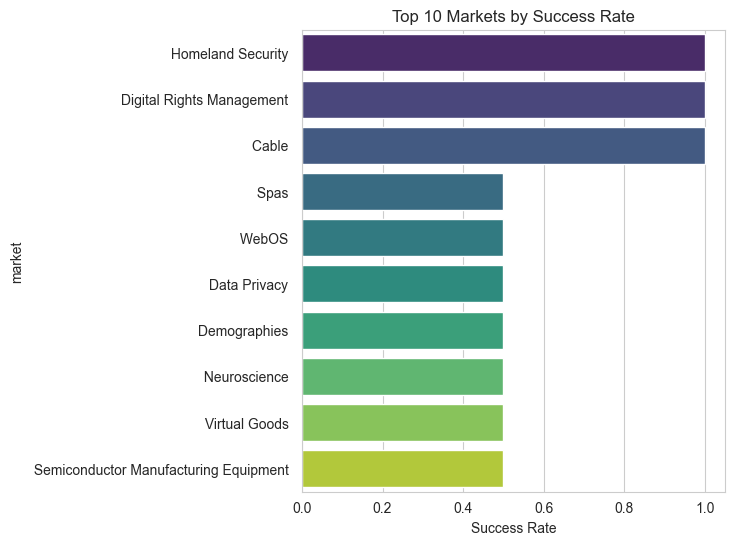

In [63]:
# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# 1. Success rate by market
plt.subplot(1, 2, 1)
market_success = clean_df.groupby('market')['success'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=market_success.values, y=market_success.index, palette='viridis')
plt.title('Top 10 Markets by Success Rate')
plt.xlabel('Success Rate')


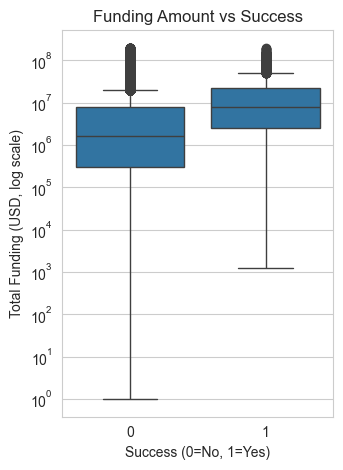

In [64]:
# 2. Funding amount vs success
plt.subplot(1, 2, 2)
sns.boxplot(x='success', y='funding_total_usd', data=clean_df[clean_df['funding_total_usd'] < clean_df['funding_total_usd'].quantile(0.99)])
plt.yscale('log')
plt.title('Funding Amount vs Success')
plt.xlabel('Success (0=No, 1=Yes)')
plt.ylabel('Total Funding (USD, log scale)')

plt.tight_layout()
plt.show()

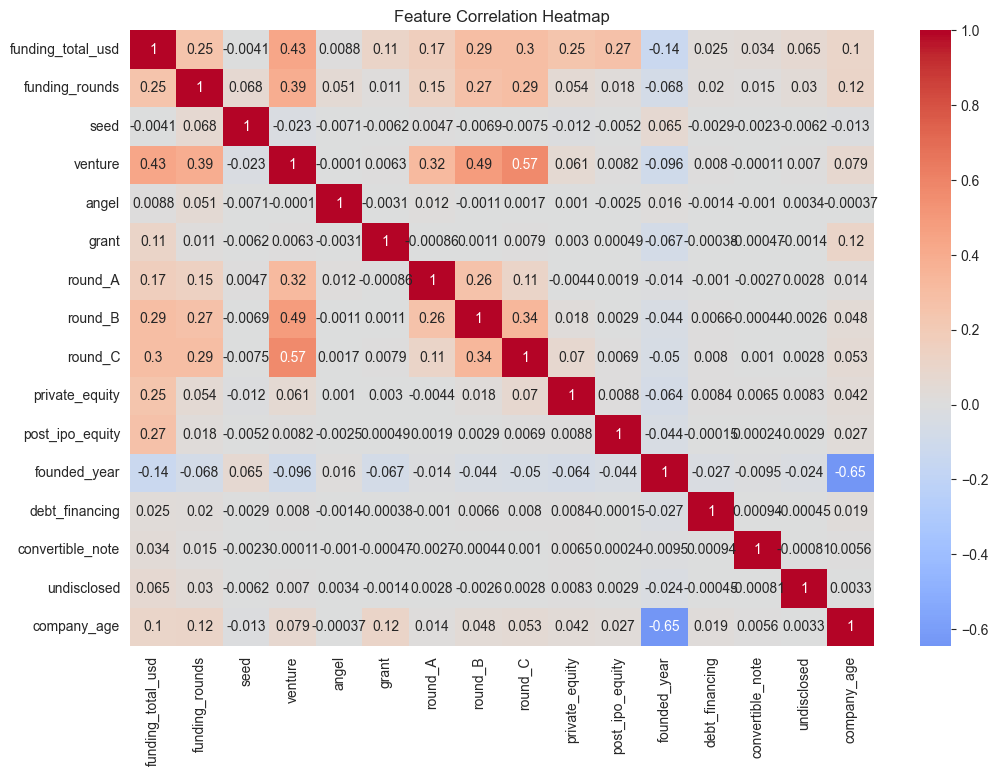

In [65]:
# 3. Correlation heatmap
plt.figure(figsize=(12, 8))
corr = clean_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


C:\Users\R I C H A R D\AppData\Local\Temp\ipykernel_10132\618529107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_success.values, y=country_success.index, palette='mako')


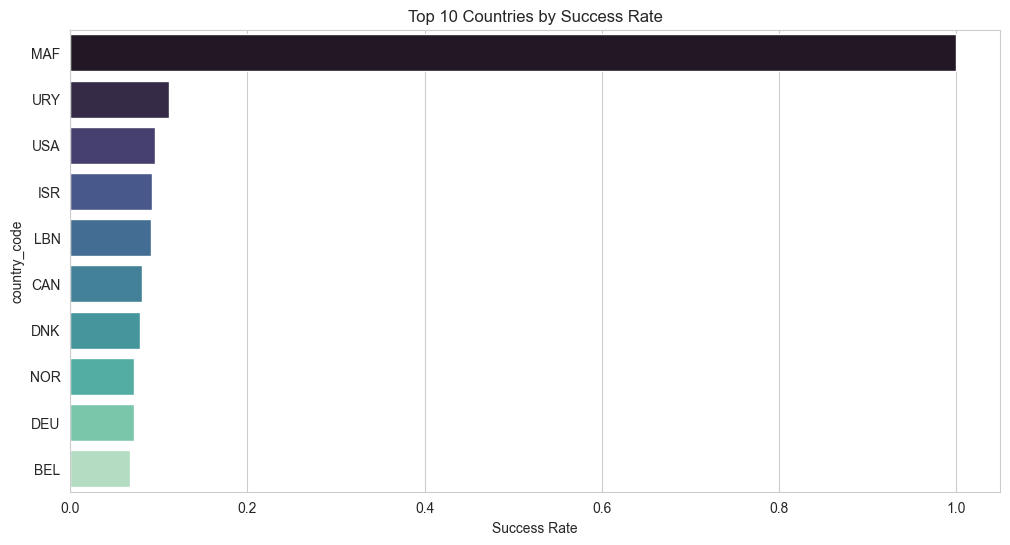

In [66]:
# 4. Success rate by country
plt.figure(figsize=(12, 6))
country_success = clean_df.groupby('country_code')['success'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=country_success.values, y=country_success.index, palette='mako')
plt.title('Top 10 Countries by Success Rate')
plt.xlabel('Success Rate')
plt.show()

In [67]:
# Create funding diversity feature
clean_df['funding_diversity'] = clean_df[['seed', 'venture', 'angel', 'grant']].gt(0).sum(axis=1)

# Create funding round efficiency feature
clean_df['funding_efficiency'] = clean_df['funding_total_usd'] / (clean_df['funding_rounds'] + 1)


In [68]:
# Create indicator for having Series A funding
clean_df['has_series_a'] = clean_df['round_A'].apply(lambda x: 1 if x > 0 else 0)

# Create indicator for having Series B funding
clean_df['has_series_b'] = clean_df['round_B'].apply(lambda x: 1 if x > 0 else 0)

# Create indicator for having Series C funding
clean_df['has_series_c'] = clean_df['round_C'].apply(lambda x: 1 if x > 0 else 0)

In [69]:
# Create log of funding amount
clean_df['log_funding'] = np.log1p(clean_df['funding_total_usd'])

c:\Users\R I C H A R D\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
# One-hot encode categorical variables
categorical_cols = ['market', 'country_code', 'primary_category']
clean_df = pd.get_dummies(clean_df, columns=categorical_cols, drop_first=True)

In [71]:
# Prepare features and target
X = clean_df.drop(['success', 'founded_at', 'city', 'region'], axis=1)
y = clean_df['success']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [72]:
# Scale numerical features
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Initialize and train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [74]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7317
           1       0.34      0.04      0.07       644

    accuracy                           0.92      7961
   macro avg       0.63      0.52      0.51      7961
weighted avg       0.87      0.92      0.88      7961


Confusion Matrix:
[[7270   47]
 [ 620   24]]

ROC AUC Score: 0.7347086721384812


Text(0.5, 1.0, 'Top 20 Important Features')

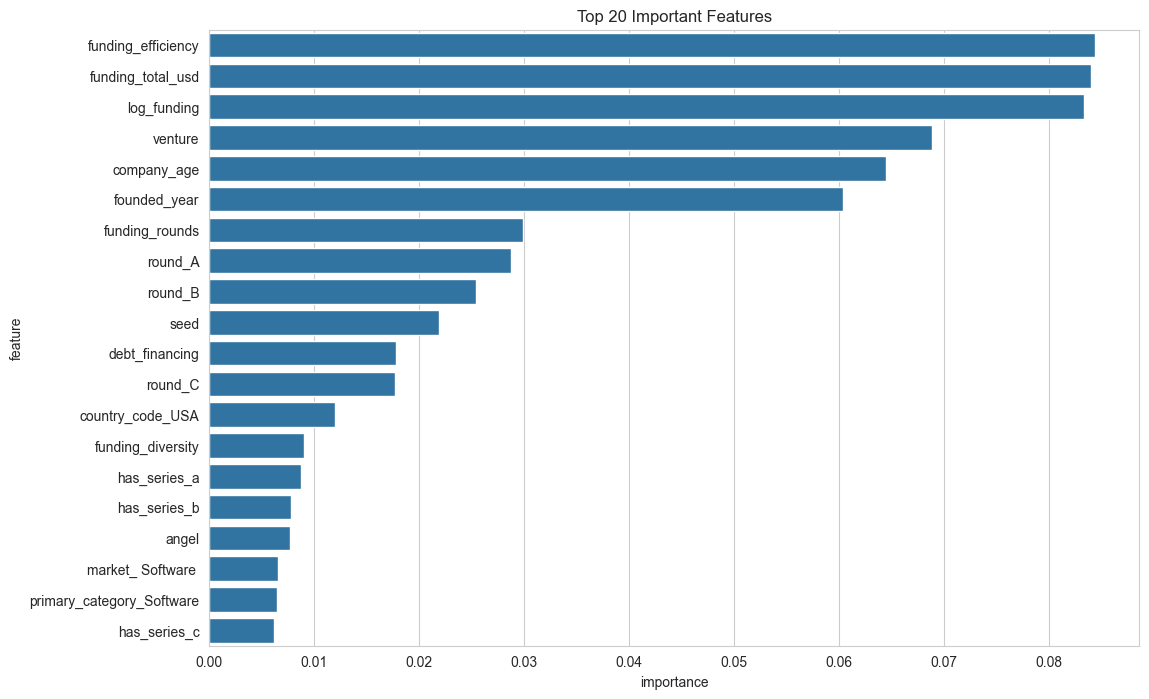

In [75]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance[:20])
plt.title('Top 20 Important Features')


In [76]:
plt.show()